# Load the required libraries

In [1]:
import geostatspy.GSLIB as GSLIB                          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                    # GSLIB methods convert to Python  

In [2]:
pip install geostatspy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os                                                 # operating system, set current working directory 
import matplotlib.pyplot as plt                           # plotting
import numpy as np                                        # arrays and matrix math
from mpl_toolkits.mplot3d import Axes3D                   # 3D scatter plots
import pandas as pd                                       # DataFrames

#### The Simulation Grid

Let's set up the regular simulation grid.

* should cover the extent of the vertical wells

* wells will have the vertical resolution and extend from this grid.  The wells are columns from this model.

This grid sepcification is the GEO-DAS format.

* the grid is assumed to be orientated with the x-y-z coordinate system (no rotation)
* $nx$, $ny$ and $nz$ are the number of cells over each coordinate
* $x_{siz}$, $y_{siz}$ and $z_{siz}$ are the sizes of the cells over each coordinate
* xmn, ymn and zmn are the respective coordinates of the lower, left, cell centroid. e.g. $x_{mn} = x_{min} + x_{size} \times 0.5$ 


In [3]:
nx = 100; ny = 100; nz = 100
hsiz = 10.0; vsiz = 1.0; seed = 73073
xmin = 0.0; ymin = 0.0; zmin = 0.0
xmax = xmin + nx * hsiz; ymax = ymin + ny * hsiz; zmax = zmin + nz * vsiz
xmn = xmin + hsiz*0.5; ymn = ymin + hsiz*0.5; zmn = zmin + vsiz*0.5

#### Spatial Continuity Model

Next we specify the variogram model to impose spatial continuity.

* see standard geostatistics textbooks (Deutsch and Journel, 1998 or Pyrcz and Deutsch, 2014) for description of variogram parameterization

In [101]:
os.chdir(r"C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Krigingsweetspot\Contains_FI")

In [5]:
data=pd.read_csv("converted_file.csv")

In [6]:
data

,DEPT,sweetspot,ESS,G&ESS,Quartz,Poisson,FI,lattitude,longitude,northing,easting
0,10800.0,GradeB,GradeC,Good,57.910614,0.094723,0.586292,44.076378,-106.099643,411950.094089,4.880944e+06
1,10805.0,GradeB,GradeB,Good,68.796470,0.099208,0.665300,44.076378,-106.099643,411950.094089,4.880944e+06
2,10810.0,GradeB,GradeC,Good,70.252240,0.104117,0.677399,44.076378,-106.099643,411950.094089,4.880944e+06
3,10815.0,GradeB,GradeC,Good,58.961450,0.084354,0.595529,44.076378,-106.099643,411950.094089,4.880944e+06
4,10820.0,GradeB,GradeB,Good,62.796837,0.081114,0.616153,44.076378,-106.099643,411950.094089,4.880944e+06
...,...,...,...,...,...,...,...,...,...,...,...
792,13661.5,GradeA,None,None,51.774117,0.101268,0.425987,43.374850,-105.825580,433118.707460,4.802774e+06
793,13666.5,GradeB,GradeC,None,64.732430,0.108406,0.528263,43.374850,-105.825580,433118.707460,4.802774e+06
794,13671.5,GradeA,None,None,62.234554,0.111375,0.393587,43.374850,-105.825580,433118.707460,4.802774e+06
795,13676.5,GradeA,None,None,53.516120,0.074643,0.408522,43.374850,-105.825580,433118.707460,4.802774e+06


In [7]:
df=data

## Summary Statistics for Tabular Data
The table includes X and Y coordinates (meters), FI represent the fracability index of the formation

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEPT,797.0,9.990034e+03,1692.466753,5.865000e+03,8.615000e+03,1.051900e+04,1.092500e+04,1.368150e+04
Quartz,797.0,5.729348e+01,9.998004,1.893586e+01,5.129228e+01,5.796704e+01,6.365293e+01,9.772306e+01
Poisson,797.0,7.442220e-02,0.038232,-2.709441e-01,5.392723e-02,7.570494e-02,9.488278e-02,2.285853e-01
FI,797.0,5.461804e-01,0.086111,4.020988e-02,4.923900e-01,5.458208e-01,5.987129e-01,8.244429e-01
lattitude,797.0,4.391268e+01,0.615818,4.197617e+01,4.352029e+01,4.383978e+01,4.453196e+01,4.494041e+01
longitude,797.0,-1.060278e+02,1.209429,-1.099534e+02,-1.060996e+02,-1.055963e+02,-1.053323e+02,-1.048801e+02
northing,797.0,4.792482e+05,89275.812709,3.563820e+05,4.331187e+05,4.622470e+05,4.937036e+05,7.172888e+05
easting,797.0,4.862821e+06,68879.337989,4.647660e+06,4.818597e+06,4.854251e+06,4.934598e+06,4.976442e+06


In [9]:
df.FI.var()

0.007415062621753379

In [11]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [12]:
import geopandas as gpd

OSError: Could not find lib geos_c.dll or load any of its variants [].

In [12]:
conda install -c conda-forge geos=3.7.1

^C

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install utm

  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6093 sha256=4bf4ba6b71abc429e6985883c2249053b6efc7e8c98de00263220eaf298fc247
  Stored in directory: c:\users\eobasi\appdata\local\pip\cache\wheels\65\e2\d8\878a8cc986641056fbfebefc4d8eb64238a7b6d3426e86b447
Successfully built utm
Note: you may need to restart the kernel to use updated packages.


In [19]:
import utm

# Coordinates of a known location in the Mowry formation (example)
y_lat= df["lattitude "][300]
x_long= df["longitude "][300]

# Get the UTM zone and hemisphere for the given coordinates
utm_zone_number, utm_zone_letter = utm.from_latlon(y_lat, x_long)[2:4]

# Construct the EPSG code for the UTM projection
epsg_code = f'EPSG:326{utm_zone_number}{utm_zone_letter}'

# Print the EPSG code for the Mowry formation
print(f"The CRS code for the Mowry formation is: {epsg_code}")


The CRS code for the Mowry formation is: EPSG:32613T


In [16]:
df["lattitude "][0]

44.076378

In [20]:
import geopandas as gpd
import utm

# Convert latitude and longitude to UTM northing and easting
df['northing'], df['easting'], _, _ = zip(*df.apply(lambda row: utm.from_latlon(row['lattitude '], row['longitude ']), axis=1))

# Set the CRS to the Mowry formation's CRS
df.crs = 'EPSG:32613T'

# Save the updated GeoDataFrame to a new CSV file
df.to_csv('converted_file.csv', index=False)


In [11]:
df

,DEPT,sweetspot,ESS,G&ESS,Quartz,Poisson,FI,lattitude,longitude,northing,easting
0,10800.0,GradeB,GradeC,Good,57.910614,0.094723,0.586292,44.076378,-106.099643,411950.094089,4.880944e+06
1,10805.0,GradeB,GradeB,Good,68.796470,0.099208,0.665300,44.076378,-106.099643,411950.094089,4.880944e+06
2,10810.0,GradeB,GradeC,Good,70.252240,0.104117,0.677399,44.076378,-106.099643,411950.094089,4.880944e+06
3,10815.0,GradeB,GradeC,Good,58.961450,0.084354,0.595529,44.076378,-106.099643,411950.094089,4.880944e+06
4,10820.0,GradeB,GradeB,Good,62.796837,0.081114,0.616153,44.076378,-106.099643,411950.094089,4.880944e+06
...,...,...,...,...,...,...,...,...,...,...,...
792,13661.5,GradeA,None,None,51.774117,0.101268,0.425987,43.374850,-105.825580,433118.707460,4.802774e+06
793,13666.5,GradeB,GradeC,None,64.732430,0.108406,0.528263,43.374850,-105.825580,433118.707460,4.802774e+06
794,13671.5,GradeA,None,None,62.234554,0.111375,0.393587,43.374850,-105.825580,433118.707460,4.802774e+06
795,13676.5,GradeA,None,None,53.516120,0.074643,0.408522,43.374850,-105.825580,433118.707460,4.802774e+06


### Check for Trend in dataset

In [14]:
GSLIB.DataFrame2ndarray

<function geostatspy.GSLIB.DataFrame2ndarray(df, xcol, ycol, vcol, xmin, xmax, ymin, ymax, step)>

In [15]:
df = df.rename(columns={'northing': 'X', 'easting': 'Y'})

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEPT,797.0,9.990034e+03,1692.466753,5.865000e+03,8.615000e+03,1.051900e+04,1.092500e+04,1.368150e+04
Quartz,797.0,5.729348e+01,9.998004,1.893586e+01,5.129228e+01,5.796704e+01,6.365293e+01,9.772306e+01
Poisson,797.0,7.442220e-02,0.038232,-2.709441e-01,5.392723e-02,7.570494e-02,9.488278e-02,2.285853e-01
FI,797.0,5.461804e-01,0.086111,4.020988e-02,4.923900e-01,5.458208e-01,5.987129e-01,8.244429e-01
lattitude,797.0,4.391268e+01,0.615818,4.197617e+01,4.352029e+01,4.383978e+01,4.453196e+01,4.494041e+01
longitude,797.0,-1.060278e+02,1.209429,-1.099534e+02,-1.060996e+02,-1.055963e+02,-1.053323e+02,-1.048801e+02
X,797.0,4.792482e+05,89275.812709,3.563820e+05,4.331187e+05,4.622470e+05,4.937036e+05,7.172888e+05
Y,797.0,4.862821e+06,68879.337989,4.647660e+06,4.818597e+06,4.854251e+06,4.934598e+06,4.976442e+06


In [17]:
xmin = 3.563820e+05; xmax = 7.272888e+05               # range of x values
ymin = 4.747660e+06 ; ymax = 4.996442e+06               # range of y values
pormin = 4.020988e-02; pormax = 8.244429e-01;           # range of porosity values
nx = 100; ny = 100; csize = 20.0
cmap = plt.cm.plasma       

In [18]:
por_grid = GSLIB.DataFrame2ndarray(df,'X','Y','FI',xmin, xmax, ymin, ymax, csize)

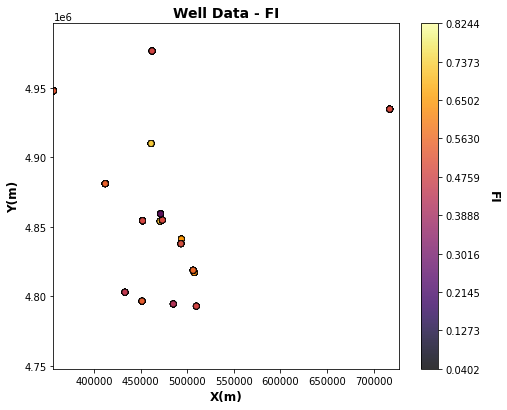

In [124]:
plt.subplot(111)
GSLIB.locmap_st(df,'X','Y','FI',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - FI','X(m)','Y(m)','FI',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [20]:
csize = 100.0

In [21]:
por_grid = GSLIB.DataFrame2ndarray(df,'X','Y','FI',xmin, xmax, ymin, ymax, csize)

In [18]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats 

In [22]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import math                               # trig etc.
import scipy.signal as signal             # kernel for moving window calculation

We have made a kernel of size, number of grid cells (ny, nx) (101, 101)


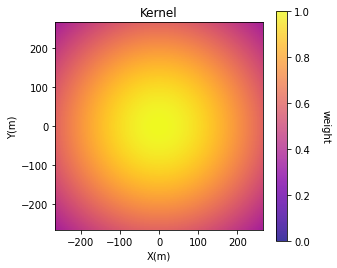

In [23]:
r = 50
s = 101

gkern1d = signal.gaussian(s,r).reshape(s, 1)
gkern2d = np.outer(gkern1d, gkern1d)
print('We have made a kernel of size, number of grid cells (ny, nx) ' + str(gkern2d.shape))

plt.subplot(111)
GSLIB.pixelplt_st(gkern2d,xmin=-265,xmax=265,ymin=-265,ymax=265,step=10,vmin=0,vmax=1,title='Kernel',xlabel='X(m)',ylabel='Y(m)',vlabel='weight',cmap=cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.6, top=0.8, wspace=0.2, hspace=0.2)
plt.show()

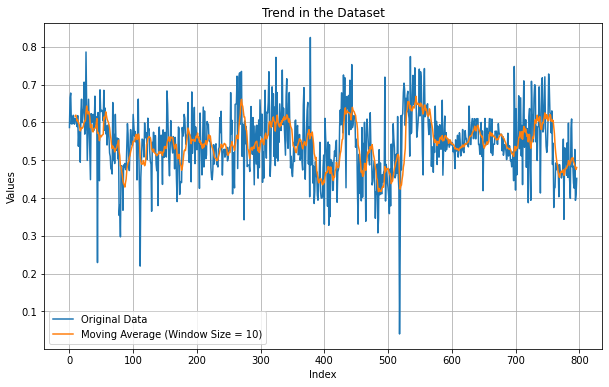

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df' with a column named 'values'

# Compute the moving average
window_size = 10  # Adjust the window size as needed
moving_avg = df['FI'].rolling(window_size).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df['FI'], label='Original Data')
plt.plot(moving_avg, label='Moving Average (Window Size = {})'.format(window_size))
plt.legend()
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Trend in the Dataset')
plt.grid(True)
plt.show()


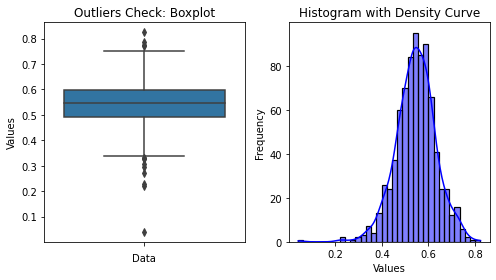

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df' with a column named 'values'

# Create a figure and axes for subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4))

# Check for outliers using boxplot
sns.boxplot(data=df, y='FI', ax=ax1)
ax1.set_xlabel('Data')
ax1.set_ylabel('Values')
ax1.set_title('Outliers Check: Boxplot')

# Plot histogram with density curve
sns.histplot(data=df, x='FI', kde=True, edgecolor='black', linewidth=1.2,color='blue',ax=ax2)
ax2.set_xlabel('Values')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram with Density Curve')

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure with higher resolution (dpi)
plt.savefig('subplot_figure1.png', dpi=300)

# Display the subplot figure
plt.show()


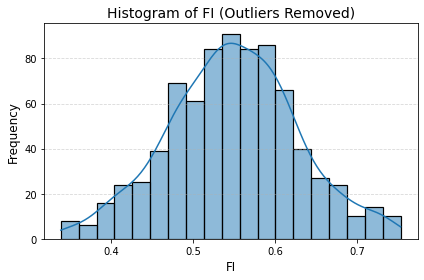

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the IQR for the 'FI' column
Q1 = df['FI'].quantile(0.25)
Q3 = df['FI'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers from the 'FI' column
df_filtered = df[(df['FI'] >= lower_bound) & (df['FI'] <= upper_bound)]

# Set up the plot figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot histogram of the filtered data with improved aesthetics
sns.histplot(data=df_filtered, x='FI', kde=True, edgecolor='black', linewidth=1.2, ax=ax)
ax.set_xlabel('FI', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Histogram of FI (Outliers Removed)', fontsize=14)

# Customize plot aesthetics
#sns.despine()
ax.tick_params(axis='both', which='both', labelsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust spacing
fig.tight_layout()

# Save the plot as a high-quality image for publication
plt.savefig('histogram.png', dpi=300)

# Display the plot
plt.show()

In [50]:
df_filtered.drop(columns=["FI_transformed","FI_log_transformed", "FI_sqrt_transformed"],axis=1,inplace=True)

C:\Users\eobasi.UWYO.000\AppData\Local\Temp\ipykernel_10012\296627026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=["FI_transformed","FI_log_transformed", "FI_sqrt_transformed"],axis=1,inplace=True)


In [27]:
df_filtered

,DEPT,sweetspot,ESS,G&ESS,Quartz,Poisson,FI,lattitude,longitude,X,Y
0,10800.0,GradeB,GradeC,Good,57.910614,0.094723,0.586292,44.076378,-106.099643,411950.094089,4.880944e+06
1,10805.0,GradeB,GradeB,Good,68.796470,0.099208,0.665300,44.076378,-106.099643,411950.094089,4.880944e+06
2,10810.0,GradeB,GradeC,Good,70.252240,0.104117,0.677399,44.076378,-106.099643,411950.094089,4.880944e+06
3,10815.0,GradeB,GradeC,Good,58.961450,0.084354,0.595529,44.076378,-106.099643,411950.094089,4.880944e+06
4,10820.0,GradeB,GradeB,Good,62.796837,0.081114,0.616153,44.076378,-106.099643,411950.094089,4.880944e+06
...,...,...,...,...,...,...,...,...,...,...,...
792,13661.5,GradeA,None,None,51.774117,0.101268,0.425987,43.374850,-105.825580,433118.707460,4.802774e+06
793,13666.5,GradeB,GradeC,None,64.732430,0.108406,0.528263,43.374850,-105.825580,433118.707460,4.802774e+06
794,13671.5,GradeA,None,None,62.234554,0.111375,0.393587,43.374850,-105.825580,433118.707460,4.802774e+06
795,13676.5,GradeA,None,None,53.516120,0.074643,0.408522,43.374850,-105.825580,433118.707460,4.802774e+06


In [28]:
geostats.declus

<function geostatspy.geostats.declus(df, xcol, ycol, vcol, iminmax, noff, ncell, cmin, cmax)>

In [29]:
wts, cell_sizes, dmeans = geostats.declus(df,'X','Y','FI',iminmax = 1, noff= 10, ncell=100,cmin=20,cmax=2000)
df['Wts'] = wts                            # add weights to the sample data DataFrame
df.head()     

There are 797 data with:
   mean of      0.5461803971794228 
   min and max  0.040209876 and 0.824442911
   standard dev 0.08605671911324898 


,DEPT,sweetspot,ESS,G&ESS,Quartz,Poisson,FI,lattitude,longitude,X,Y,Wts
0,10800.0,GradeB,GradeC,Good,57.910614,0.094723,0.586292,44.076378,-106.099643,411950.094089,4.880944e+06,1.0
1,10805.0,GradeB,GradeB,Good,68.796470,0.099208,0.665300,44.076378,-106.099643,411950.094089,4.880944e+06,1.0
2,10810.0,GradeB,GradeC,Good,70.252240,0.104117,0.677399,44.076378,-106.099643,411950.094089,4.880944e+06,1.0
3,10815.0,GradeB,GradeC,Good,58.961450,0.084354,0.595529,44.076378,-106.099643,411950.094089,4.880944e+06,1.0
4,10820.0,GradeB,GradeB,Good,62.796837,0.081114,0.616153,44.076378,-106.099643,411950.094089,4.880944e+06,1.0


In [30]:
df.head() 

,DEPT,sweetspot,ESS,G&ESS,Quartz,Poisson,FI,lattitude,longitude,X,Y,Wts
0,10800.0,GradeB,GradeC,Good,57.910614,0.094723,0.586292,44.076378,-106.099643,411950.094089,4.880944e+06,1.0
1,10805.0,GradeB,GradeB,Good,68.796470,0.099208,0.665300,44.076378,-106.099643,411950.094089,4.880944e+06,1.0
2,10810.0,GradeB,GradeC,Good,70.252240,0.104117,0.677399,44.076378,-106.099643,411950.094089,4.880944e+06,1.0
3,10815.0,GradeB,GradeC,Good,58.961450,0.084354,0.595529,44.076378,-106.099643,411950.094089,4.880944e+06,1.0
4,10820.0,GradeB,GradeB,Good,62.796837,0.081114,0.616153,44.076378,-106.099643,411950.094089,4.880944e+06,1.0


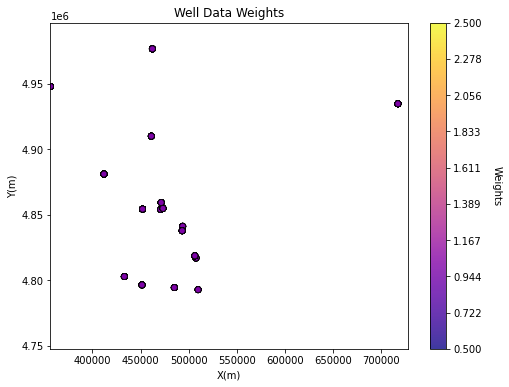

In [31]:
GSLIB.locmap(df,'X','Y','Wts',xmin,xmax,ymin,ymax,0.5,2.5,'Well Data Weights','X(m)','Y(m)','Weights',cmap,'locmap_Weights')

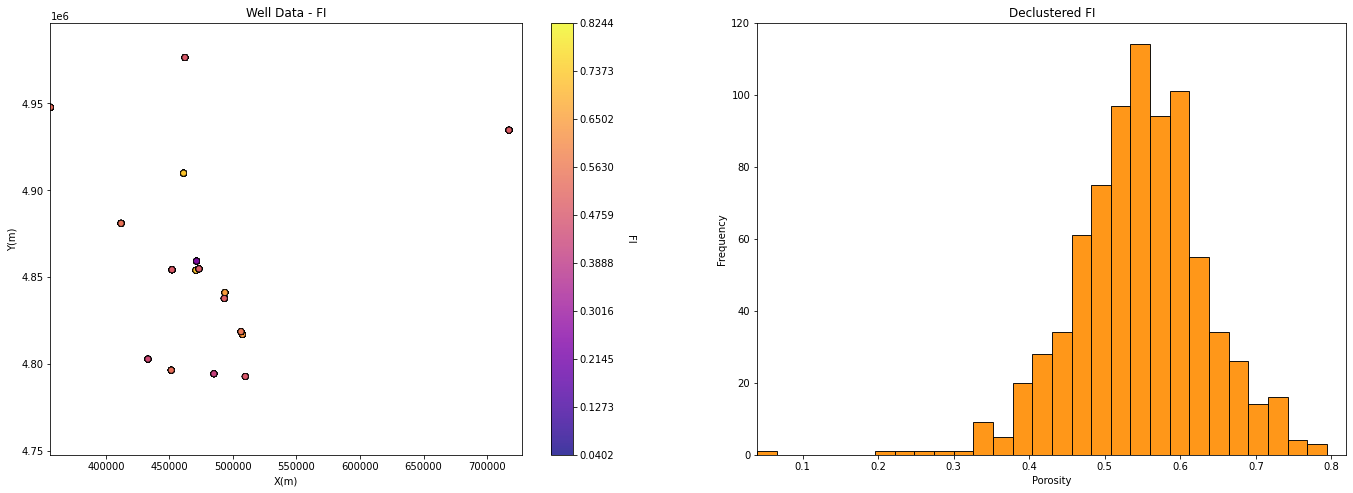

In [32]:
plt.subplot(121)
GSLIB.locmap_st(df,'X','Y','FI',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - FI','X(m)','Y(m)','FI',cmap)

plt.subplot(122)
GSLIB.hist_st(df['FI'],0.04,0.82,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Porosity",title="Declustered FI")
plt.ylim(0.0,120)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.2)
plt.show()

In [33]:
GSLIB.affine

<function geostatspy.GSLIB.affine(array, tmean, tstdev)>

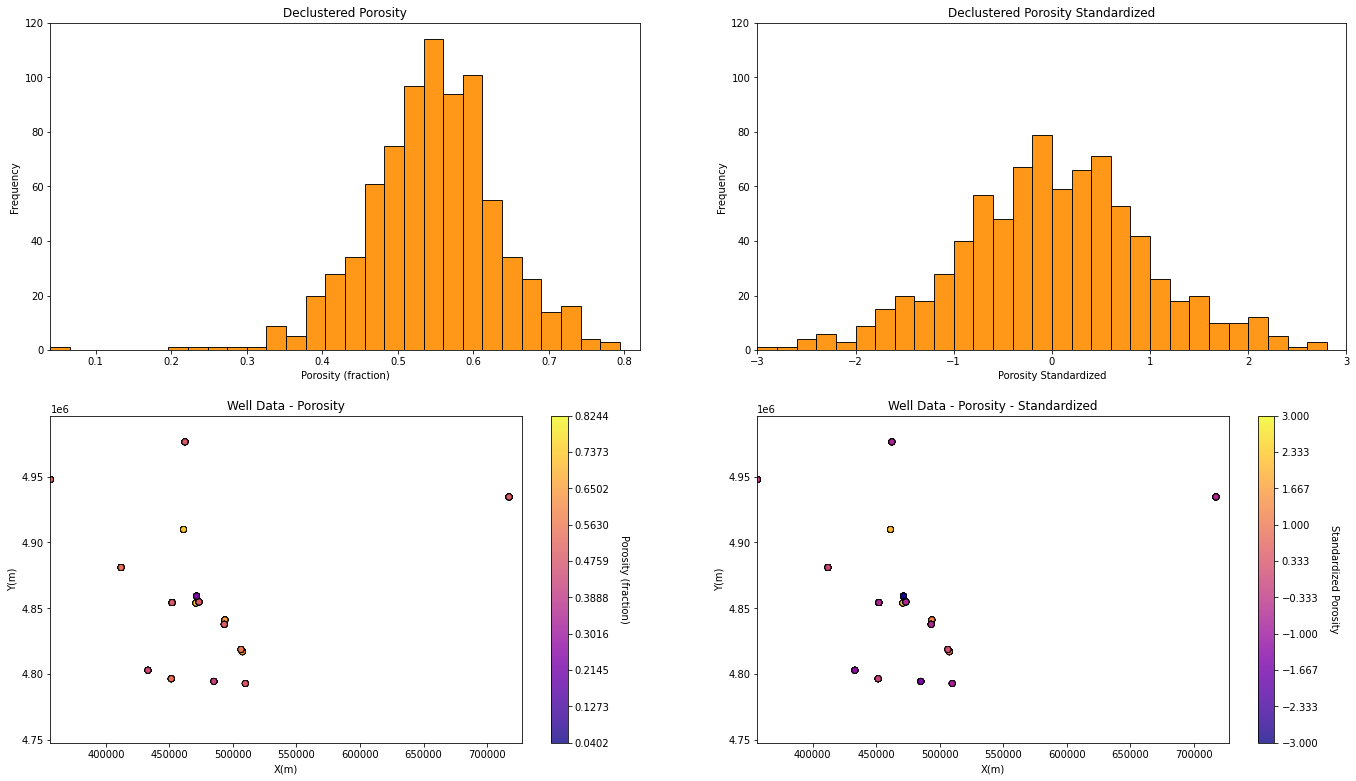

In [34]:
por_original = df['FI'].values      # extract the pororsity data as a ndarray
por1 = GSLIB.affine(por_original,0.0,1.0) # rescale the porosity to have a standard distribution
df['standPor'] = por1

plt.subplot(221)
GSLIB.hist_st(df['FI'],0.04,0.82,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Porosity (fraction)",title="Declustered Porosity")
plt.ylim(0.0,120)

plt.subplot(222)
GSLIB.hist_st(df['standPor'],-3.0,3.0,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Porosity Standardized",title="Declustered Porosity Standardized")
plt.ylim(0.0,120)

plt.subplot(223)
GSLIB.locmap_st(df,'X','Y','FI',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(224)
GSLIB.locmap_st(df,'X','Y','standPor',xmin,xmax,ymin,ymax,-3,3,'Well Data - Porosity - Standardized','X(m)','Y(m)','Standardized Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

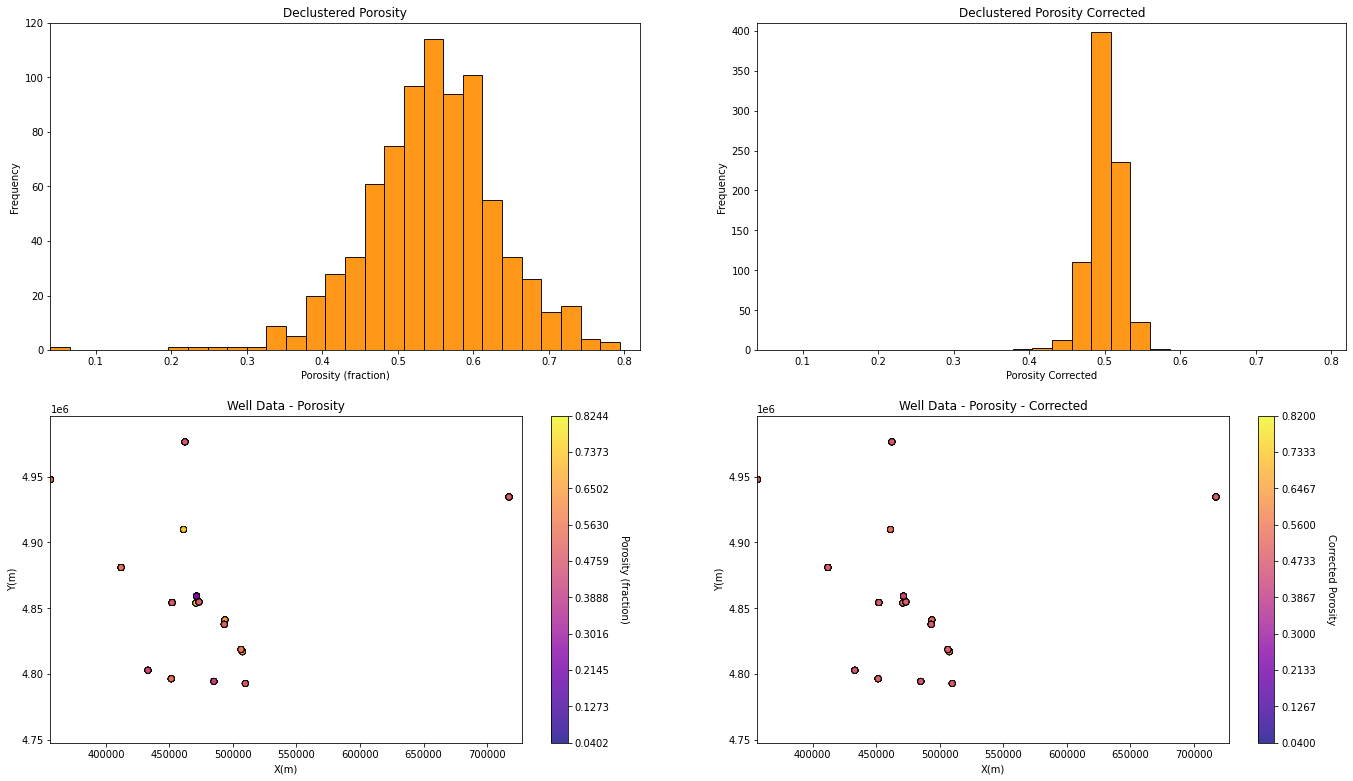

In [35]:
por_original = df['FI'].values      # extract the pororsity data as a ndarray
por2 = GSLIB.affine(por_original,0.5,0.02) # rescale the porosity to have a standard distribution
df['adjustedPor'] = por2

plt.subplot(221)
GSLIB.hist_st(df['FI'],0.04,0.82,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Porosity (fraction)",title="Declustered Porosity")
plt.ylim(0.0,120)

plt.subplot(222)
GSLIB.hist_st(df['adjustedPor'],0.04,0.82,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Porosity Corrected",title="Declustered Porosity Corrected")
plt.ylim(0.0,410)

plt.subplot(223)
GSLIB.locmap_st(df,'X','Y','FI',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(224)
GSLIB.locmap_st(df,'X','Y','adjustedPor',xmin,xmax,ymin,ymax,0.04,0.82,'Well Data - Porosity - Corrected','X(m)','Y(m)','Corrected Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

## Normal Score Transform / Gaussian Anamorphosis

In [36]:
geostats.nscore

<function geostatspy.geostats.nscore(df, vcol, wcol=None, ismooth=False, dfsmooth=None, smcol=0, smwcol=0)>

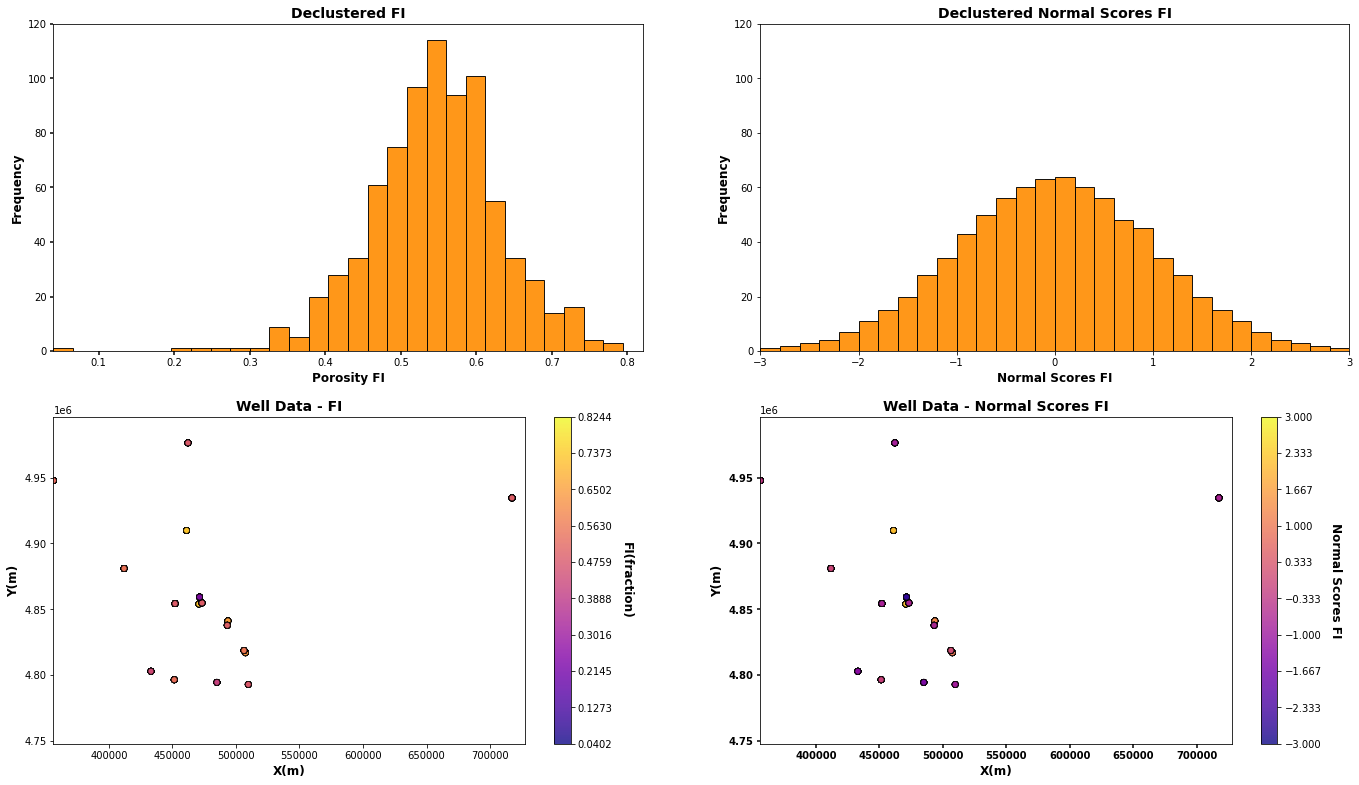

In [37]:
# Set thicker line width
plt.rcParams['lines.linewidth'] = 1.5

# Set larger font size for axis labels and titles
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# Set font weight to 'bold' for axis labels and titles
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.tick_params(axis='x', which='major', width=1.5, labelsize=10,)

# Set the thickness and font properties for y-axis major ticks
plt.tick_params(axis='y', which='major', width=1.5, labelsize=10,)


ns_por,trans_vr,trans_ns = geostats.nscore(df,'FI','Wts')
df['NPor'] = ns_por

plt.subplot(221)
GSLIB.hist_st(df['FI'],0.04,0.82,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Porosity FI",title="Declustered FI")
plt.ylim(0.0,120)
plt.tick_params(axis='x', which='major', width=1.5, labelsize=10,)

# Set the thickness and font properties for y-axis major ticks
plt.tick_params(axis='y', which='major', width=1.5, labelsize=10,)

plt.subplot(222)
GSLIB.hist_st(df['NPor'],-3.0,3.0,log=False,cumul=False,bins=30,weights=df['Wts'],xlabel="Normal Scores FI",title="Declustered Normal Scores FI")
plt.ylim(0.0,120)

plt.subplot(223)
GSLIB.locmap_st(df,'X','Y','FI',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - FI','X(m)','Y(m)','FI(fraction)',cmap)

plt.subplot(224)
GSLIB.locmap_st(df,'X','Y','NPor',xmin,xmax,ymin,ymax,-3.0,3.0,'Well Data - Normal Scores FI','X(m)','Y(m)','Normal Scores FI',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.5, wspace=0.2, hspace=0.2)
#Set the thickness and font properties for x-axis major ticks
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.tick_params(axis='x', which='major', width=1.5, labelsize=10,)

# Set the thickness and font properties for y-axis major ticks
plt.tick_params(axis='y', which='major', width=1.5, labelsize=10,)
# Set the font size and weight for x-axis and y-axis labels




# Show the plot
plt.show()


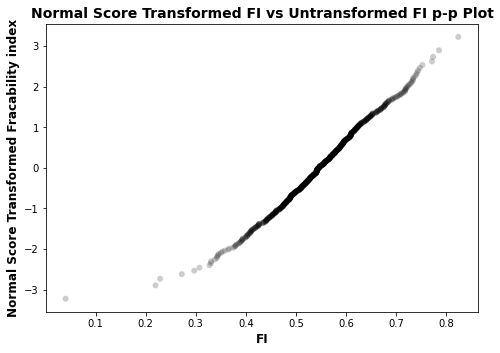

In [38]:
plt.subplot(111)
plt.scatter(trans_vr,trans_ns, c = "black", marker='o', alpha = 0.2, edgecolors = "none")
plt.xlabel('FI')
plt.ylabel('Normal Score Transformed Fracability index')
plt.title('Normal Score Transformed FI vs Untransformed FI p-p Plot')
#plt.ylim(-4,4)
#plt.xlim(0,.30)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

In [39]:
df

,DEPT,sweetspot,ESS,G&ESS,Quartz,Poisson,FI,lattitude,longitude,X,Y,Wts,standPor,adjustedPor,NPor
0,10800.0,GradeB,GradeC,Good,57.910614,0.094723,0.586292,44.076378,-106.099643,411950.094089,4.880944e+06,1.0,0.466112,0.509322,0.480156
1,10805.0,GradeB,GradeB,Good,68.796470,0.099208,0.665300,44.076378,-106.099643,411950.094089,4.880944e+06,1.0,1.384201,0.527684,1.415786
2,10810.0,GradeB,GradeC,Good,70.252240,0.104117,0.677399,44.076378,-106.099643,411950.094089,4.880944e+06,1.0,1.524791,0.530496,1.527144
3,10815.0,GradeB,GradeC,Good,58.961450,0.084354,0.595529,44.076378,-106.099643,411950.094089,4.880944e+06,1.0,0.573443,0.511469,0.630709
4,10820.0,GradeB,GradeB,Good,62.796837,0.081114,0.616153,44.076378,-106.099643,411950.094089,4.880944e+06,1.0,0.813103,0.516262,0.905654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,13661.5,GradeA,None,None,51.774117,0.101268,0.425987,43.374850,-105.825580,433118.707460,4.802774e+06,1.0,-1.396671,0.472067,-1.407269
793,13666.5,GradeB,GradeC,None,64.732430,0.108406,0.528263,43.374850,-105.825580,433118.707460,4.802774e+06,1.0,-0.208200,0.495836,-0.260824
794,13671.5,GradeA,None,None,62.234554,0.111375,0.393587,43.374850,-105.825580,433118.707460,4.802774e+06,1.0,-1.773172,0.464537,-1.771142
795,13676.5,GradeA,None,None,53.516120,0.074643,0.408522,43.374850,-105.825580,433118.707460,4.802774e+06,1.0,-1.599625,0.468008,-1.601983


In [40]:
df.to_csv(r"C:\Users\eobasi\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\Krigingsweetspot\Contains_FI\FI_normalTransformed.csv")

## 2D Stochastic Gaussian Simulation in Python for Engineers and Geoscientists

## Sequential Gaussian Simulation


 Data for SGSIM: Number of acceptable data     = 797
                 Number trimmed                = 0
                 Weighted Average              = -0.0032
                 Weighted Variance             = 1.032
                 Weighted Transformed Average  = 0.0004
                 Weighted Transformed Variance = 0.9986
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = 0.0593 (close to 0.0?)
                                   variance = 0.5229 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 797
                 Number trimmed                = 0
   

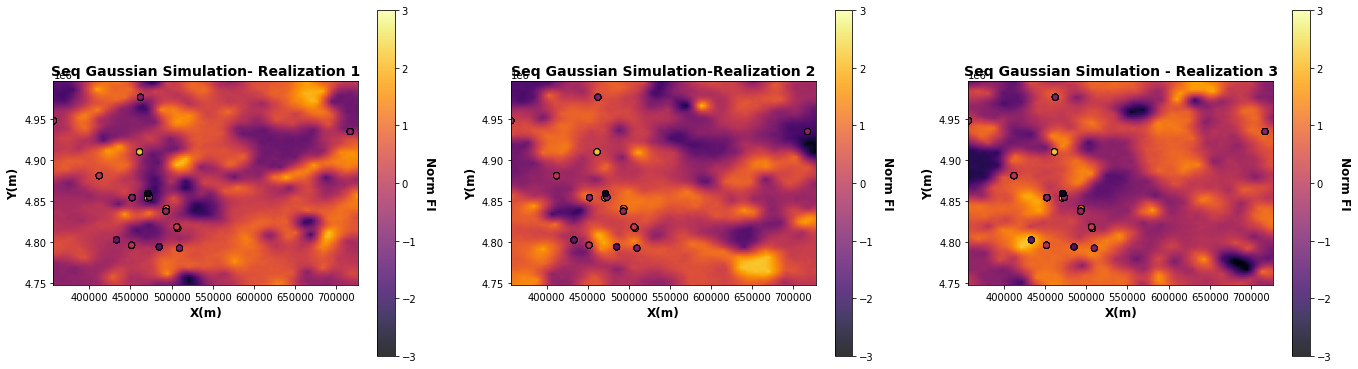

In [78]:
# Demonstration of Multiple Realizations - Short Continuity
nx = 100; ny = 100; xsiz = 20.0; ysiz = 20.0; xmn = 50.0; ymn = 50.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 20; radius = 400; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=65.0,hmaj1=50000,hmin1=50000)
tmin = -999; tmax = 999

sim = geostats.sgsim(df,'X','Y','NPor',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,twtcol=0,
            zmin=-3,zmax=3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim2 = geostats.sgsim(df,'X','Y','NPor',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=-3,zmax=3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73072,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim3 = geostats.sgsim(df,'X','Y','NPor',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=-3,zmax=3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73071,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

cmap = plt.cm.inferno
plt.subplot(131)
GSLIB.locpix_st(sim,xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','Seq Gaussian Simulation- Realization 1','X(m)','Y(m)','Norm FI',cmap)

plt.subplot(132)
GSLIB.locpix_st(sim2,xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','Seq Gaussian Simulation-Realization 2','X(m)','Y(m)','Norm FI',cmap)

plt.subplot(133)
GSLIB.locpix_st(sim3,xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','Seq Gaussian Simulation - Realization 3','X(m)','Y(m)','Norm FI',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [108]:
import gc

gc.collect()

33119

In [44]:
geostats.gamv  

<function geostatspy.geostats.gamv(df, xcol, ycol, vcol, tmin, tmax, xlag, xltol, nlag, azm, atol, bandwh, isill)>

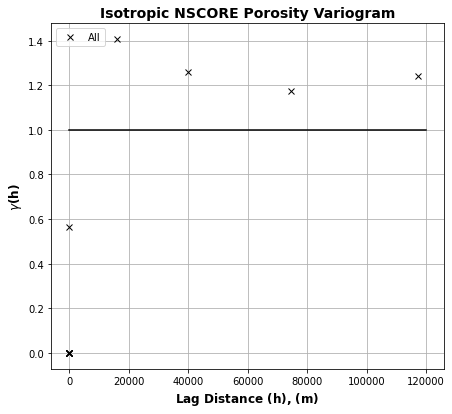

In [45]:
# Calculate Sample Data Isotropic Variograms
tmin = -9999.; tmax = 9999.; 
lag_dist = 50000.0; lag_tol = 50000.0; nlag = 10; bandh = 9999.9; azi = 0; atol = 90.0; isill = 1

#lag, por_sand_gamma, por_sand_npair = geostats.gamv(df,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)
#lag, por_shale_gamma, por_shale_npair = geostats.gamv(df_shale,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)
lag, por_gamma, por_npair = geostats.gamv(df,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)

#lag, perm_sand_gamma, perm_sand_npair = geostats.gamv(df_sand,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)
#lag, perm_shale_gamma, perm_shale_npair = geostats.gamv(df_shale,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)
#lag, perm_gamma, perm_npair = geostats.gamv(df,"X","Y","NPerm",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)

plt.subplot(121)
plt.plot(lag,por_gamma,'x',color = 'black',label = 'All')
#plt.plot(lag,por_sand_gamma,'x',color = 'orange',label = 'Sand')
#plt.plot(lag,por_shale_gamma,'x',color = 'brown',label = 'Shale')
plt.plot([0,120000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic NSCORE Porosity Variogram')
#plt.xlim([0,700])
#plt.ylim([0,1.8])
plt.legend(loc='upper left')
plt.grid(True)

#plt.subplot(122)
#plt.plot(lag,perm_sand_gamma,'x',color = 'orange',label = 'Sand')
#plt.plot(lag,perm_shale_gamma,'x',color = 'brown',label = 'Shale')
#plt.plot([0,2000],[1.0,1.0],color = 'black')
#plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
#plt.ylabel(r'$\gamma \bf(h)$')
#plt.title('Isotropic NSCORE Permeaiblity Variogram')
#plt.xlim([0,700])
#plt.ylim([0,1.8])
#plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

In [114]:
import math

# Iterate over the DataFrame rows
for i in range(len(df) - 1):
    # Get the Northing and Easting coordinates for the current and next rows
    northing1 = df.loc[i, 'Y']
    easting1 = df.loc[i, 'X']
    
    northing2 = df.loc[i + 1, 'Y']
    easting2 = df.loc[i + 1, 'X']
    
    # Calculate the differences in Northing and Easting
    delta_northing = northing2 - northing1
    delta_easting = easting2 - easting1
    
    # Calculate the distance using the Pythagorean theorem
    distance = math.sqrt(delta_northing**2 + delta_easting**2)
    
    # Print or store the distance
    print(f"Distance between points {i} and {i + 1}: {distance}")

Distance between points 0 and 1: 0.0
Distance between points 1 and 2: 0.0
Distance between points 2 and 3: 0.0
Distance between points 3 and 4: 0.0
Distance between points 4 and 5: 0.0
Distance between points 5 and 6: 0.0
Distance between points 6 and 7: 0.0
Distance between points 7 and 8: 0.0
Distance between points 8 and 9: 0.0
Distance between points 9 and 10: 0.0
Distance between points 10 and 11: 0.0
Distance between points 11 and 12: 0.0
Distance between points 12 and 13: 0.0
Distance between points 13 and 14: 0.0
Distance between points 14 and 15: 0.0
Distance between points 15 and 16: 0.0
Distance between points 16 and 17: 0.0
Distance between points 17 and 18: 0.0
Distance between points 18 and 19: 0.0
Distance between points 19 and 20: 0.0
Distance between points 20 and 21: 0.0
Distance between points 21 and 22: 0.0
Distance between points 22 and 23: 0.0
Distance between points 23 and 24: 0.0
Distance between points 24 and 25: 0.0
Distance between points 25 and 26: 0.0
Dista

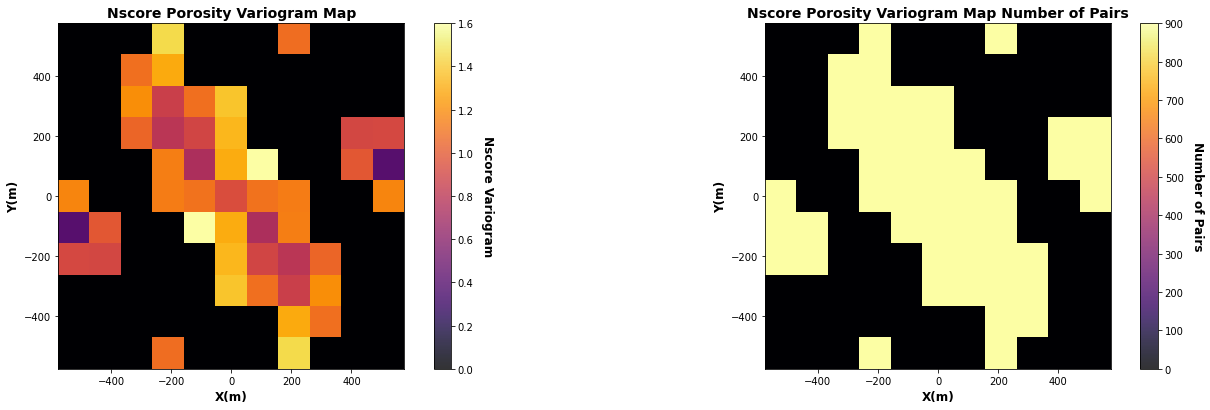

The shape of the output is (11, 11)


In [46]:
vmap, npmap = geostats.varmapv(df,'X','Y','NPor',tmin=-999,tmax=999,nxlag=5,nylag=5,dxlag=50000,dylag=50000,minnp=1,isill=1)

plt.subplot(121)
GSLIB.pixelplt_st(vmap,-575,575,-575,575,50.0,0,1.6,'Nscore Porosity Variogram Map','X(m)','Y(m)','Nscore Variogram',cmap)

plt.subplot(122)
GSLIB.pixelplt_st(npmap,-575,575,-575,575,50.0,0,900,'Nscore Porosity Variogram Map Number of Pairs','X(m)','Y(m)','Number of Pairs',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

print('The shape of the output is ' + str(vmap.shape))

In [47]:
tmin = -9999.; tmax = 9999.                             # no trimming 
lag_dist = 50000.0; lag_tol = 50000.0; nlag = 5;            # maximum lag is 700m and tolerance > 1/2 lag distance for smoothing
bandh = 9999.9; atol = 22.5                             # no bandwidth, directional variograms
isill = 1                                               # standardize sill
azi_mat = [0,22.5,45,67.5,90,112.5,135,157.5]           # directions in azimuth to consider

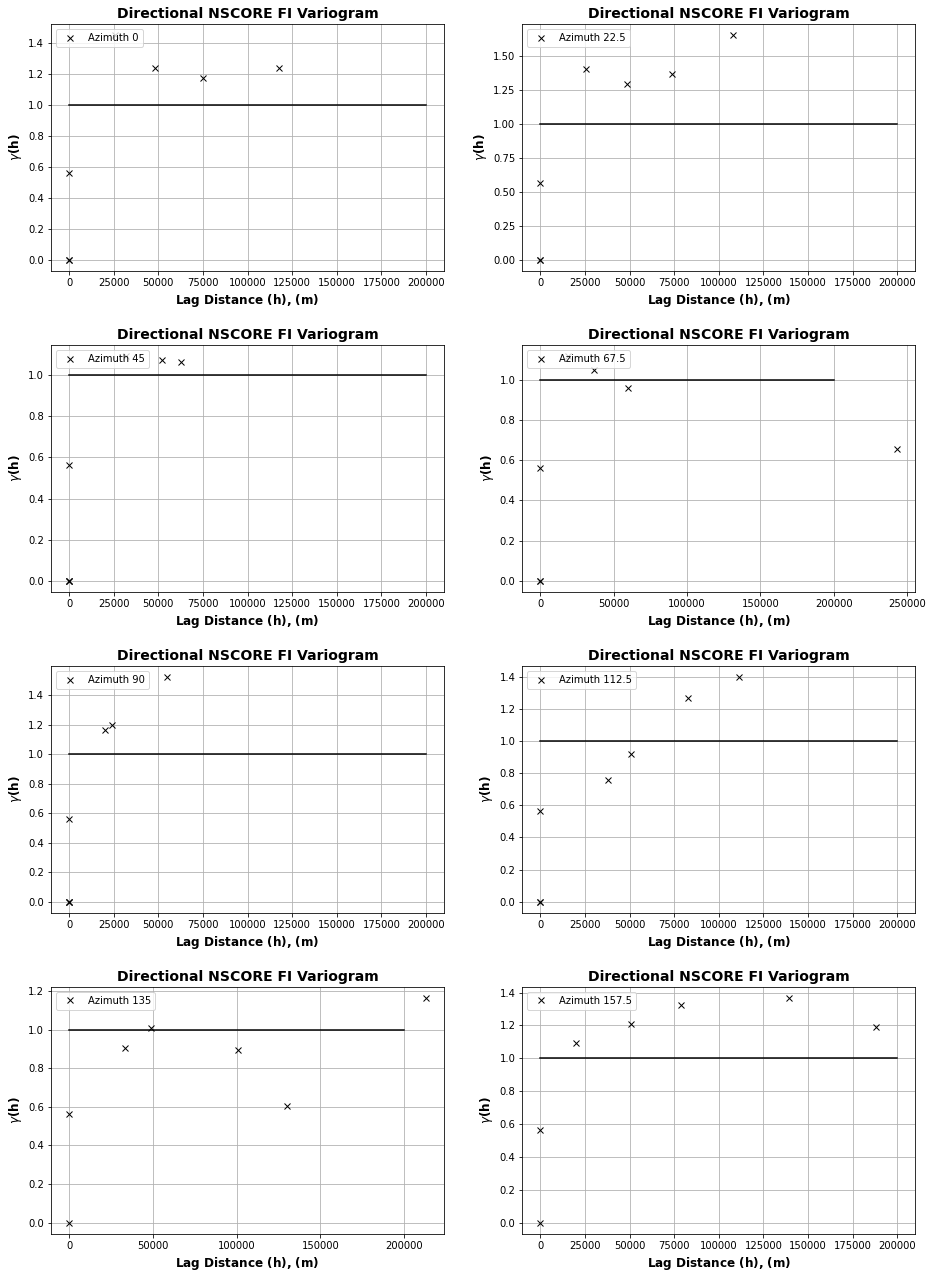

In [48]:
 #Arrays to store the results
lag = np.zeros((len(azi_mat),nlag+2)); gamma = np.zeros((len(azi_mat),nlag+2)); npp = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag[iazi,:], gamma[iazi,:], npp[iazi,:] = geostats.gamv(df,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(4,2,iazi+1)
    plt.plot(lag[iazi,:],gamma[iazi,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,200000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
    plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE FI Variogram')
    #plt.xlim([0,700])
    #plt.ylim([0,1.8])
    plt.legend(loc='upper left')
    plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

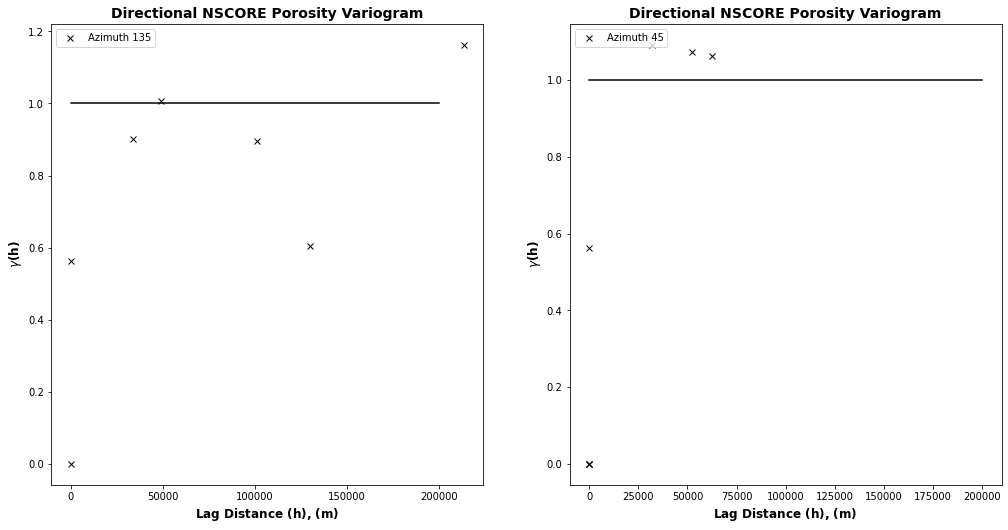

In [55]:
plt.subplot(1,2,1)
plt.plot(lag[6,:],gamma[6,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[6]))
plt.plot([0,200000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
#plt.xlim([0,700])
#plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lag[2,:],gamma[2,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[2]))
plt.plot([0,200000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
#plt.xlim([0,700])
#plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()

 x,y,z offsets = 7.071067805519558,7.071067818211393
 x,y,z offsets = 7.071067830903227,-7.071067792827723


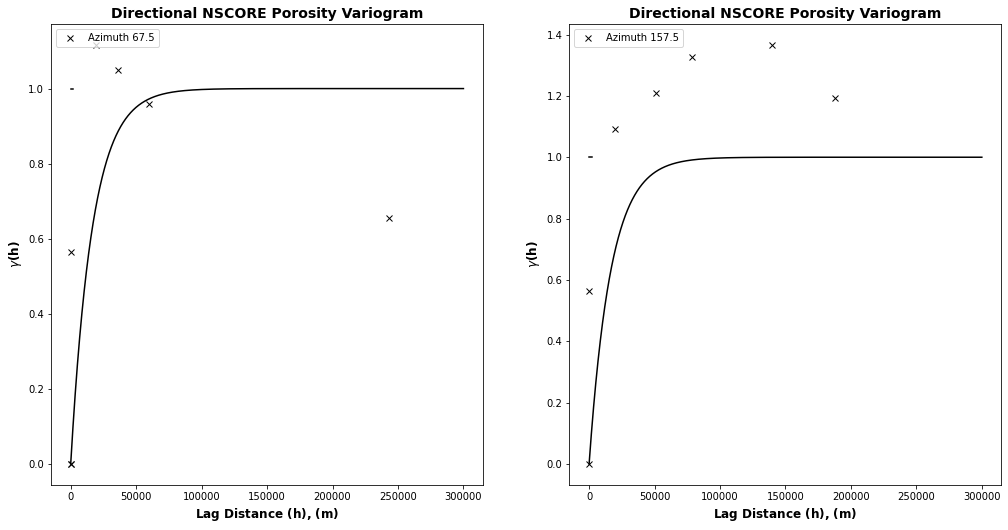

In [73]:
nug = 0.0; nst = 2                                             # 2 nest structure variogram model parameters
it1 = 2; cc1 = 0.6; azi1 = 45; hmaj1 = 50000; hmin1 = 50000
it2 = 2; cc2 = 0.4; azi2 = 45; hmaj2 = 50000; hmin2 = 50000

vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1,it2,cc2,azi2,hmaj2,hmin2) # make model object
nlag = 30000; xlag =10 ; azm = 45;                                # project the model in the 045 azimuth
index45,h45,gam45,cov45,ro45 = geostats.vmodel(nlag,xlag,azm,vario)
azm = 135                                                      # project the model in the 135 azimuth
index135,h135,gam135,cov135,ro135 = geostats.vmodel(nlag,xlag,azm,vario)

plt.subplot(1,2,1)
plt.plot(lag[3,:],gamma[3,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[3]))
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.plot(h45,gam45,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
#plt.xlim([0,700])
#plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(lag[7,:],gamma[7,:],'x',color = 'black',label = 'Azimuth ' +str(azi_mat[7]))
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.plot(h135,gam135,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Porosity Variogram')
#plt.xlim([0,700])
#plt.ylim([0,1.8])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()


 Data for SGSIM: Number of acceptable data     = 797
                 Number trimmed                = 0
                 Weighted Average              = -0.0032
                 Weighted Variance             = 1.032
                 Weighted Transformed Average  = 0.0004
                 Weighted Transformed Variance = 0.9986
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.0106 (close to 0.0?)
                                   variance = 0.4614 (close to gammabar(V,V)? approx. 1.0)


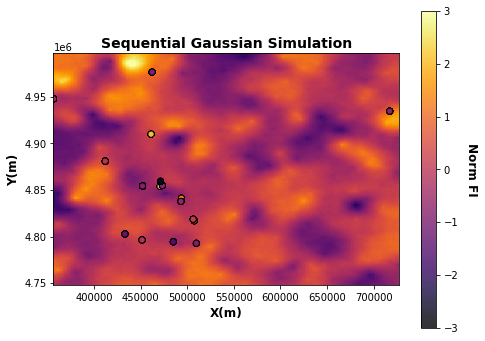

In [75]:
# Simple Kriging vs. Ordinary Kriging
nx = 100; ny = 100; xsiz = 20.0; ysiz = 20.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 10; radius = 500; skmean = 0
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=2,cc1=1.0,azi1=45,hmaj1=50000,hmin1=50000)
tmin = -999; tmax = 999

sim_sk = geostats.sgsim(df,'X','Y','NPor',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=-3,zmax=3,ltail=1,ltpar=0.0,utail=1,utpar=0.82,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73074,
            ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=0,colocorr=0.0,sec_map=0,vario=vario)

# sim_ok = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
#             twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
#             nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
#             ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
#             mxctx=10,mxcty=10,ktype=1,colocorr=0.0,sec_map=0,vario=vario)

cmap = plt.cm.inferno
plt.subplot(111)                                          # plot the results
GSLIB.locpix_st(sim_sk,xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','Sequential Gaussian Simulation','X(m)','Y(m)','Norm FI',cmap)
# plt.subplot(222)
# GSLIB.locpix_st(sim_ok,xmin,xmax,ymin,ymax,xsiz,0.0,0.30,df,'X','Y','Porosity','Sequential Gaussian Simulation - Ordinary Kriging','X(m)','Y(m)','Porosity',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)
plt.show()


 Data for SGSIM: Number of acceptable data     = 797
                 Number trimmed                = 0
                 Weighted Average              = -0.0032
                 Weighted Variance             = 1.032
                 Weighted Transformed Average  = 0.0004
                 Weighted Transformed Variance = 0.9986
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = 0.0427 (close to 0.0?)
                                   variance = 0.5294 (close to gammabar(V,V)? approx. 1.0)


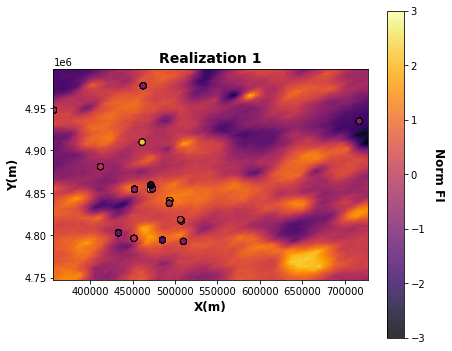

In [76]:
# Strongly Anisotropic Realization
nx = 100; ny = 100; xsiz = 20.0; ysiz = 20.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 10; radius = 20000; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=60.0,hmaj1=20000,hmin1=10000)
tmin = -999; tmax = 999

sim_anis = geostats.sgsim(df,'X','Y','NPor',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=-3,zmax=3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73072,
            ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

cmap = plt.cm.inferno
plt.subplot(221)
GSLIB.locpix_st(sim_anis,xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','Realization 1','X(m)','Y(m)','Norm FI',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()


 Data for SGSIM: Number of acceptable data     = 797
                 Number trimmed                = 0
                 Weighted Average              = -0.0032
                 Weighted Variance             = 1.032
                 Weighted Transformed Average  = 0.0004
                 Weighted Transformed Variance = 0.9986
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = 0.0566 (close to 0.0?)
                                   variance = 0.5243 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 797
                 Number trimmed                = 0
   

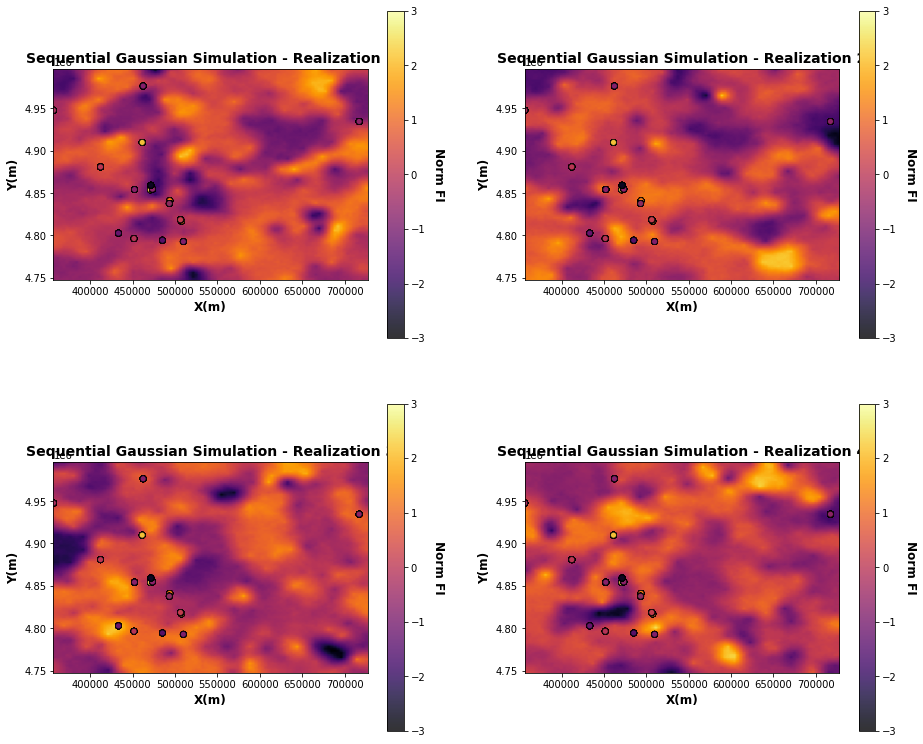

In [77]:
# Demonstration of Multiple Realizations - Short Continuity
nx = 100; ny = 100; xsiz = 20.0; ysiz = 20.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 10; radius = 20000; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=67.5,hmaj1=25000,hmin1=25000)
tmin = -999; tmax = 999

sim = geostats.sgsim(df,'X','Y','NPor',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=-3,zmax=3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim2 = geostats.sgsim(df,'X','Y','NPor',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=-3,zmax=3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73072,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim3 = geostats.sgsim(df,'X','Y','NPor',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=-3,zmax=3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73071,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim4 = geostats.sgsim(df,'X','Y','NPor',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=-3,zmax=3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73070,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

cmap = plt.cm.inferno
plt.subplot(221)
GSLIB.locpix_st(sim,xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','Sequential Gaussian Simulation - Realization 1','X(m)','Y(m)','Norm FI',cmap)

plt.subplot(222)
GSLIB.locpix_st(sim2,xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','Sequential Gaussian Simulation - Realization 2','X(m)','Y(m)','Norm FI',cmap)

plt.subplot(223)
GSLIB.locpix_st(sim3,xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','Sequential Gaussian Simulation - Realization 3','X(m)','Y(m)','Norm FI',cmap)

plt.subplot(224)
GSLIB.locpix_st(sim4,xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','Sequential Gaussian Simulation - Realization 4','X(m)','Y(m)','Norm FI',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

In [79]:
%matplotlib inline

## Calculating Multiple Realizations
- Let's calculate multiple realizations and visualize a few of them to check. Note, we need enough realizations to be able to summarize the local uncertainties over the models. I defaulted to 20, you can reduce this to improve the run time, but the results will be more noisy!


 Data for SGSIM: Number of acceptable data     = 797
                 Number trimmed                = 0
                 Weighted Average              = -0.0032
                 Weighted Variance             = 1.032
                 Weighted Transformed Average  = 0.0004
                 Weighted Transformed Variance = 0.9986
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = 0.0594 (close to 0.0?)
                                   variance = 0.5229 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 797
                 Number trimmed                = 0
   

   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.1133 (close to 0.0?)
                                   variance = 0.5084 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 797
                 Number trimmed                = 0
                 Weighted Average              = -0.0032
                 Weighted Variance             = 1.032
                 Weighted Transformed Average  = 0.0004
                 Weighted Transformed Variance = 0.9986
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   

   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = 0.1595 (close to 0.0?)
                                   variance = 0.5327 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 797
                 Number trimmed                = 0
                 Weighted Average              = -0.0032
                 Weighted Variance             = 1.032
                 Weighted Transformed Average  = 0.0004
                 Weighted Transformed Variance = 0.9986
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10

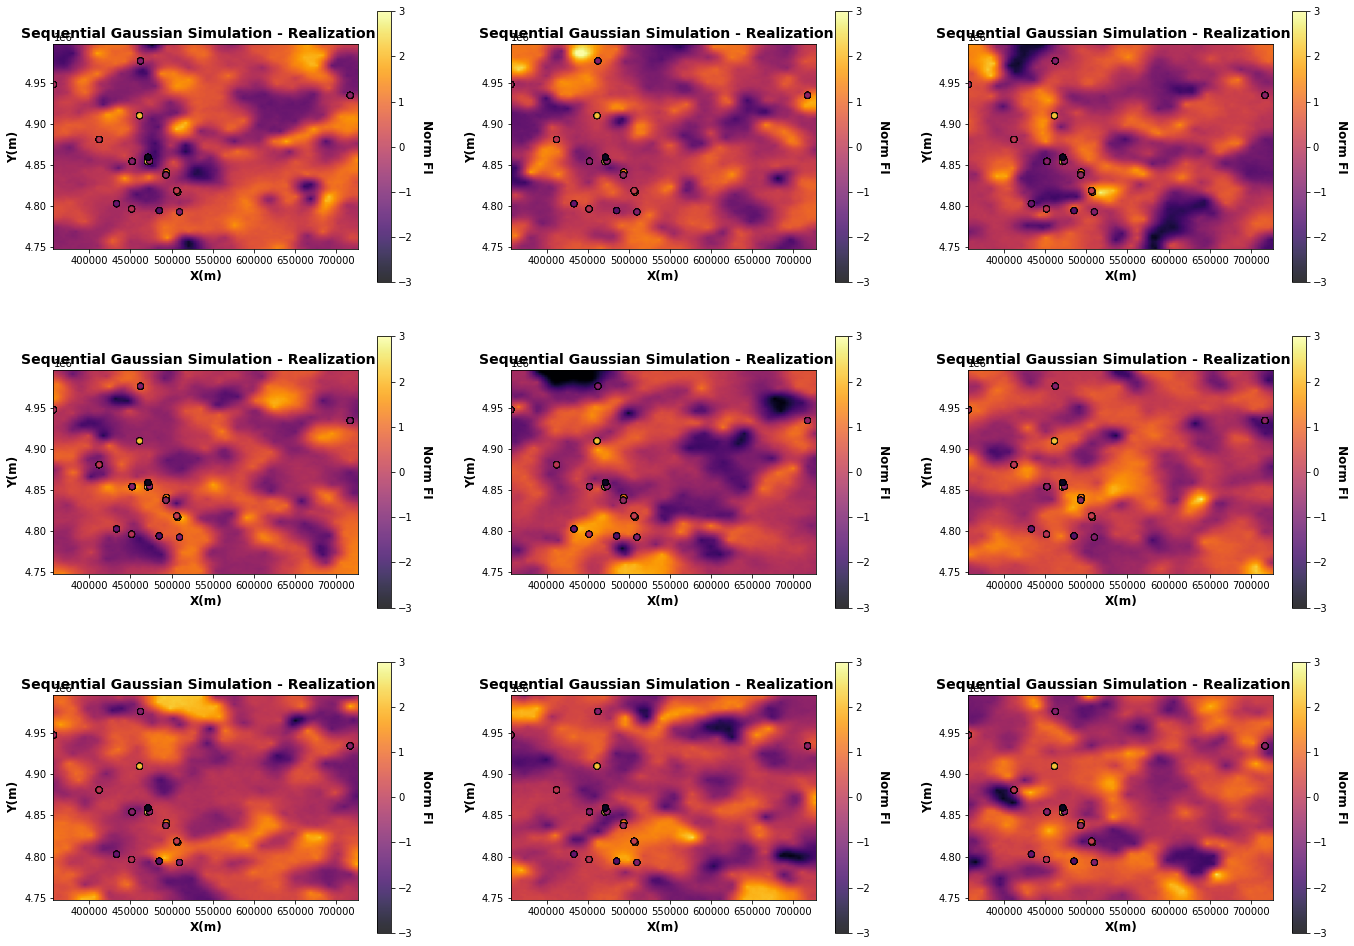

In [80]:
 #Demonstration of Multiple Realizations - Short Continuity
nx = 100; ny = 100; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
cmap = plt.cm.inferno

ndmin = 0; ndmax = 10; radius = 500; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=67.5,hmaj1=25000,hmin1=25000)
tmin = -999; tmax = 999

nreal = 20                               # number of bootstrap realizations                             
realizations = np.zeros((ny,nx,nreal));

for ireal in range(0,nreal):
    realizations[:,:,ireal] = geostats.sgsim(df,'X','Y','NPor',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=-3,zmax=3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073 + ireal,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

for ireal in range(0,min(nreal,9)):
    plt.subplot(3,3,ireal+1)
    GSLIB.locpix_st(realizations[:,:,ireal],xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','Sequential Gaussian Simulation - Realization ' + str(ireal+1),'X(m)','Y(m)','Norm FI',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.2, hspace=0.2)
plt.show()

## Summarizing Local Uncertainty with the POSTSIM Method
- Let's run the POSTSIM algorithm. It simply loops over all the locations ix and iy and calculates local summary statistics to quantify the local uncertainty.

### e-type and Conditional Variance
We will start with the e-type and the conditional variance.

- e-type is the local expectation (just the average of the 
 realizations at location 
 as we assume all realizations are equally likely).
- conditional variance is the local variance
Note, we just have to run the program once because both of these outputs are included together.

In [82]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEPT,797.0,9.990034e+03,1692.466753,5.865000e+03,8.615000e+03,1.051900e+04,1.092500e+04,1.368150e+04
Quartz,797.0,5.729348e+01,9.998004,1.893586e+01,5.129228e+01,5.796704e+01,6.365293e+01,9.772306e+01
Poisson,797.0,7.442220e-02,0.038232,-2.709441e-01,5.392723e-02,7.570494e-02,9.488278e-02,2.285853e-01
FI,797.0,5.461804e-01,0.086111,4.020988e-02,4.923900e-01,5.458208e-01,5.987129e-01,8.244429e-01
lattitude,797.0,4.391268e+01,0.615818,4.197617e+01,4.352029e+01,4.383978e+01,4.453196e+01,4.494041e+01
longitude,797.0,-1.060278e+02,1.209429,-1.099534e+02,-1.060996e+02,-1.055963e+02,-1.053323e+02,-1.048801e+02
X,797.0,4.792482e+05,89275.812709,3.563820e+05,4.331187e+05,4.622470e+05,4.937036e+05,7.172888e+05
Y,797.0,4.862821e+06,68879.337989,4.647660e+06,4.818597e+06,4.854251e+06,4.934598e+06,4.976442e+06
Wts,797.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
standPor,797.0,4.697205e-16,1.000628,-5.879500e+00,-6.250576e-01,-4.178200e-03,6.104409e-01,3.233478e+00


In [83]:
def local_expectation(realizations):                      # calculate the local expectation / average realization
    cond_exp = np.zeros((ny,nx))
    for iy in range(0,ny): 
        for ix in range(0,nx): 
            cond_exp[iy,ix] = np.average(a = realizations[iy,ix,:])  
    return cond_exp

def local_standard_deviation(realizations):               # calculate the local standard deviation of realizations
    local_stdev = np.zeros((ny,nx))
    for iy in range(0,ny): 
        for ix in range(0,nx): 
            local_stdev[iy,ix] = np.std(a = realizations[iy,ix,:])  
    return local_stdev
 
def local_percentile(realizations,p_value):               # calculate the local percentile of realizations
    percentile = np.zeros((ny,nx))
    for iy in range(0,ny): 
        for ix in range(0,nx): 
            percentile[iy,ix] = np.percentile(a = realizations[iy,ix,:], q = p_value)  
    return percentile

def local_probability_exceedance(realizations,threshold): # calculate the local probability of exceeding a threshold 
    prob_exceed = np.zeros((ny,nx))
    for iy in range(0,ny): 
        for ix in range(0,nx): 
            prob_exceed[iy,ix] = np.sum(realizations[iy,ix,:] >= threshold)/realizations[0,0,:].size 
    return prob_exceed

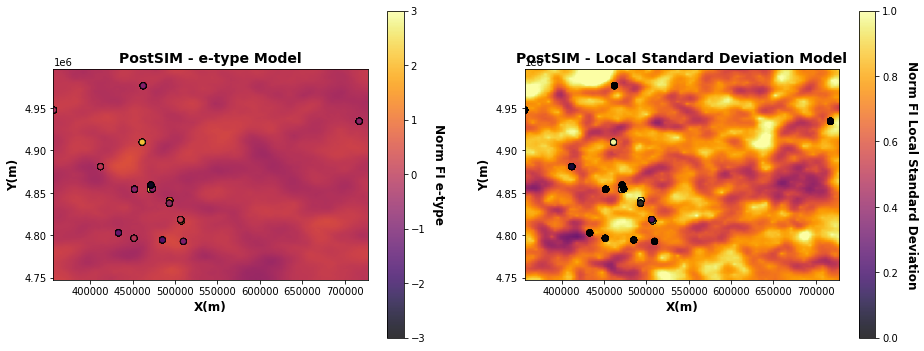

In [87]:
e_type = local_expectation(realizations)
local_stdev = local_standard_deviation(realizations)

plt.subplot(2,2,1)
GSLIB.locpix_st(e_type,xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','PostSIM - e-type Model','X(m)','Y(m)','Norm FI e-type',cmap)

plt.subplot(2,2,2)
GSLIB.locpix_st(local_stdev,xmin,xmax,ymin,ymax,xsiz,0.0,1,df,'X','Y','NPor','PostSIM - Local Standard Deviation Model','X(m)','Y(m)','Norm FI Local Standard Deviation',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

The e-type model is very simlar to a kriging model, except for:

- the Gaussian forward and back transform may change the results
- result are noisy due to too few realizations
The conditional variance is lowest at the data locations and increased away from the data

- the result is noisy due to too few realizations
### Local Percentiles
Now let's look at the:

- local percentile maps are the maps with the local percentile values sampled from the local realizations
We can interprete them as follows, at a location if we have a local P10 of 14% porosity, then we have a 90% probability of an even higher porosity, the porosity at that location is surely high.

Local percentiles are very convenient to understand local uncertainty. We must make sure that we do not mix them up with a percentile model (the model that is globally ranked as a specific percentile outcome.

Note: we have to run the program for each percentile, we specify this as the cdf_value input.

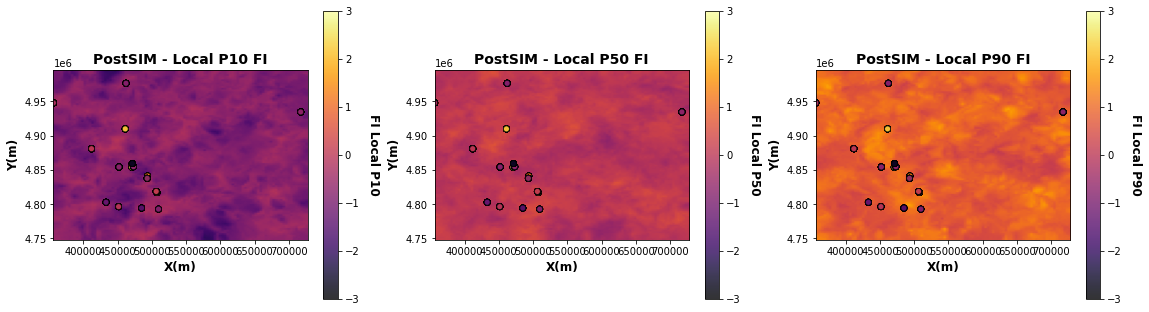

In [88]:
localp10 = local_percentile(realizations = realizations,p_value = 10)

localp50 = local_percentile(realizations = realizations,p_value = 50)

localp90 = local_percentile(realizations = realizations,p_value = 90)


plt.subplot(1,3,1)
GSLIB.locpix_st(localp10,xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','PostSIM - Local P10 FI','X(m)','Y(m)','FI Local P10',cmap)

plt.subplot(1,3,2)
GSLIB.locpix_st(localp50,xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','PostSIM - Local P50 FI','X(m)','Y(m)','FI Local P50',cmap)

plt.subplot(1,3,3)
GSLIB.locpix_st(localp90,xmin,xmax,ymin,ymax,xsiz,-3,3,df,'X','Y','NPor','PostSIM - Local P90 FI','X(m)','Y(m)','FI Local P90',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=1., wspace=0.2, hspace=0.2)
plt.show()

### Probability of Exceedance
Now we will look at the:

- probability of exceedance where we specify a threshold porosity value and calculate the probability of exceeding that value at all locations.
We will typically select critical thresholds, such as a net-to-gross threshold.

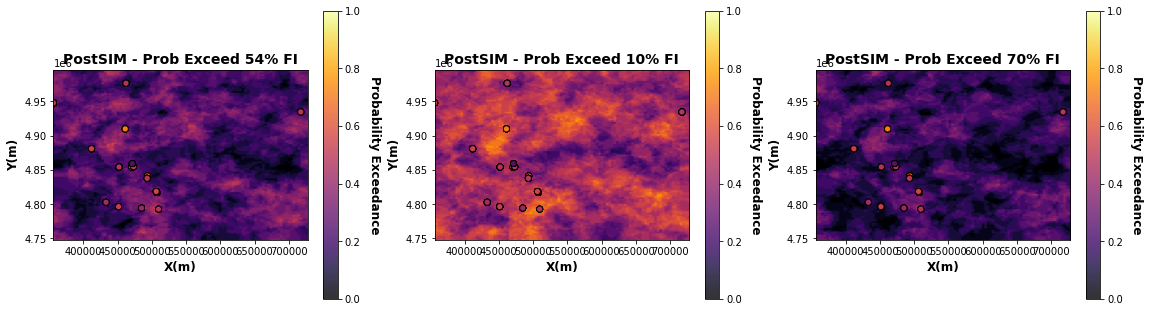

In [89]:
prob10 = local_probability_exceedance(realizations = realizations,threshold = 0.54)

prob13 = local_probability_exceedance(realizations = realizations,threshold = 0.10)

prob16 = local_probability_exceedance(realizations = realizations,threshold = 0.70)

plt.subplot(1,3,1)
GSLIB.locpix_st(prob10,xmin,xmax,ymin,ymax,xsiz,0.0,1.,df,'X','Y','FI','PostSIM - Prob Exceed 54% FI','X(m)','Y(m)','Probability Exceedance',cmap)

plt.subplot(1,3,2)
GSLIB.locpix_st(prob13,xmin,xmax,ymin,ymax,xsiz,0.0,1.,df,'X','Y','FI','PostSIM - Prob Exceed 10% FI','X(m)','Y(m)','Probability Exceedance',cmap)

plt.subplot(1,3,3)
GSLIB.locpix_st(prob16,xmin,xmax,ymin,ymax,xsiz,0.0,1.,df,'X','Y','FI','PostSIM - Prob Exceed 70% FI','X(m)','Y(m)','Probability Exceedance',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=1., wspace=0.2, hspace=0.2)
plt.show()

## 3D well maker 

Run the sequential Gaussian simulation to build a realization over the specified grid

- honors the target distribution
- honors the vairogram model

The wrapper:

- creates a sgsim.par file in the working directory
- runs the sgsim executable with the parameter file
- reads the results back in as an numpy ndarray

In [ ]:
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=67.5,hmaj1=25000,hmin1=25000)

In [109]:
hmax = 1000; hmin = 1000; hvert = 20.0 

In [110]:
vario1 = geostats.make_variogram_3D(nug = 0.0,nst = 1,it1 = 1,cc1 = 1,azi1 = 45,dip1 = 0.0,
    hmax1 = hmax,hmed1 = hmin,hmin1 = hvert)

In [116]:
vario1

{'nug': 0.0,
 'nst': 1,
 'it1': 1,
 'cc1': 1,
 'azi1': 45,
 'dip1': 0.0,
 'hmax1': 1000,
 'hmed1': 1000,
 'hmin1': 20.0,
 'it2': 1,
 'cc2': 0,
 'azi2': 0,
 'dip2': 0,
 'hmax2': 0,
 'hmed2': 0,
 'hmin2': 0}

In [122]:
sim10 = GSLIB.sgsim_3D(nreal=1, df=df, xcol='X', ycol='Y', zcol='DEPT', vcol='FI', nx=nx, ny=ny, nz=nz, 
                     hsiz=hsiz, vsiz=vsiz, seed=seed, var=vario1, output_file= "sgsim3d.out")
print('The ndarray is indexed ireal, iy, ix, iz with size ' + str(sim.shape) + '.')

FileNotFoundError: [Errno 2] No such file or directory: 'sgsim3d.out'

In [121]:
sim10

NameError: name 'sim10' is not defined

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

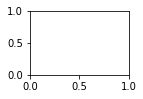

In [119]:
plt.subplot(3,3,1)
plt.imshow(sim[0,:,:,0])

plt.subplot(3,3,2)
plt.imshow(sim[0,:,:,10])

plt.subplot(3,3,3)
plt.imshow(sim[0,:,:,20])

plt.subplot(3,3,4)
plt.imshow(sim[0,:,:,30])

plt.subplot(3,3,5)
plt.imshow(sim[0,:,:,40])

plt.subplot(3,3,6)
plt.imshow(sim[0,:,:,50])

plt.subplot(3,3,7)
plt.imshow(sim[0,:,:,60])

plt.subplot(3,3,8)
plt.imshow(sim[0,:,:,70])

plt.subplot(3,3,9)
plt.imshow(sim[0,:,:,80])

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.2, hspace=0.2) # plot formatting
plt.show()


In [98]:
df.columns

Index(['DEPT', 'sweetspot', 'ESS', 'G&ESS', 'Quartz', 'Poisson', 'FI',
       'lattitude ', 'longitude ', 'X', 'Y', 'Wts', 'standPor', 'adjustedPor',
       'NPor'],
      dtype='object')

In [174]:
df.columns

Index(['DEPT', 'sweetspot', 'ESS', 'G&ESS', 'Quartz', 'Poisson', 'FI',
       'lattitude ', 'longitude ', 'X', 'Y', 'FI_transformed',
       'FI_log_transformed', 'FI_sqrt_transformed', 'Wts', 'standPor',
       'adjustedPor', 'NPor'],
      dtype='object')

In [ ]:
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(132)
GSLIB.pixelplt_st(porosity_trend,xmin,xmax,ymin,ymax,csize,pormin,pormax,'Porosity Trend','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(133)
GSLIB.locpix_st(porosity_trend,xmin,xmax,ymin,ymax,csize,pormin,pormax,df,'X','Y','Porosity','Porosity Data and Trend','X(m)','Y(m)','Porosity (fraciton)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [ ]:
nst = 1; azi = 0.0; nug = 0.0; sill = 1                        # specify 3D variogram model parameters
hmax = 1000.0; hmin = 1000.0; hvert = 10.0                     # we are assuming 1 structure, another could be added
#hmax = 0.01; hmin = 0.01; hvert = 0.01                        # end case testing, test local distributions match global distribution

# Make variogram object for GeostatsPy
vario = geostats.make_variogram_3D(nug = 0.0,nst = nst,it1 = 1,cc1 = sill - nug,azi1 = azi,dip1 = 0.0,
    hmax1 = hmax,hmed1 = hmin,hmin1 = hvert)